# Taipan data analysis NCCO

In [1]:
# Author: Kristine M. L. Krighaar
# Niels Bohr Institute, University of Copenhagen
#
# This notebook should run in NCCO_Env 


from KGS import *
from TASDataObjectTAIPANSQ import *
from scipy.interpolate import UnivariateSpline
import h5py

data_path = './Data_TAIPAN/'

/Users/kristinekrighaar/Library/CloudStorage/GoogleDrive-krighaar.nbi@gmail.com/Mit drev/NCCO/Article_Code/TASDataObjectTAIPANSQ.py:258: SyntaxWarning: invalid escape sequence '\o'
  ax.set_ylabel('$S(Q, \omega)$')


In [2]:
## Fitting the area of the phonon branches. 

def A_N_gauss(x, A_tot, f1, mu1, sigma1, mu2, sigma2,b):
    return A_tot*(f1*(1)/(np.sqrt(2*np.pi*sigma1**2))* np.exp(-(x-mu1)** 2 / (2*sigma1**2))+(1-f1)* (1)/(np.sqrt(2*np.pi*sigma2**2)) *np.exp(-(x-mu2)** 2 / (2*sigma2**2)))+b

## Phonon Normalization

### SC Phonon

In [3]:
sc_raw_phonon = np.loadtxt(data_path+'TAIPAN_exp1285_scan99052.dat', skiprows=31)

sc_raw_phonon_a = np.flipud(sc_raw_phonon)

#We need to scale the phonon measurements of the annealed (SC) sample by the fraction 655/avg(373 cnt, 405 cnt, 362 cnt). We assume that the SC sample was off by the same temperature. 

sc_qh_phonon = sc_raw_phonon_a[:,3]
sc_qk_phonon =sc_raw_phonon_a[:,4]

sc_mon_phonon = sc_raw_phonon_a[:,13]
sc_I_phonon = sc_raw_phonon_a[:,11]*655/np.mean([373,405,362])/sc_mon_phonon#*655/np.mean([373,405,362])
sc_I_err_phonon = np.sqrt(sc_I_phonon)/sc_mon_phonon

params = {'A_tot': 0.1, 'f1': 0.5 ,'mu1':-0.1, 'sigma1':0.05, 
          'mu2': 0.05, 'sigma2':27.50e-3, 'b':0.00005}

limits = {'mu1': (-0.1, -0.07), 'sigma1':(0,0.2),'mu2':(0.03,0.1),'sigma2':(0,0.5), 'b':(0,None)}

gaussN_fit = fit(sc_qk_phonon, sc_I_phonon, sc_I_err_phonon, A_N_gauss, params, limits=limits)
gaussN_fit.hesse()


/Users/kristinekrighaar/Documents/KGS/KGS/fitting.py:302: FutureWarning: make_func_code is deprecated: Use of ``func_code`` attribute to declare parameters is deprecated. Use ``_parameters`` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.772e+08                  │              Nfcn = 858              │
│ EDM = 2.43e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_tot  │180.4439e-6│ 0.0030e-6 │            │            │         │         │       │
│ 1 │ f1     │353.576e-3 │ 0.008e-3  │            │            │         │         │       │
│ 2 │ mu1    │-70.000000000e-3│0.000000032e-3│            │            │  -0.1   │  -0.07  │       │
│ 3 │ sigma1 │18.2343e-3 │ 0.0004e-3 │            │            │    0    │   0.2   │       │
│ 4 │ mu2    │30.00000000e-3│0.00000022e-3│            │            │  0.03   │   0.1   │       │
│ 5 │ sigma2 │49.0654e-3 │ 0.0009e-3 │            │            │    0    │   0.5   │       │
│ 6 │ b      │ 25.032e-6 │ 0.007e-6  │            │            │    0    │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬──────────────────────────────────────────────────────────────────────────────┐
│        │      A_tot         f1        mu1     sigma1        mu2     sigma2          b │
├────────┼──────────────────────────────────────────────────────────────────────────────┤
│  A_tot │   9.19e-18 -4.788e-15          0    288e-18  -0.01e-24  1.111e-15    -13e-18 │
│     f1 │ -4.788e-15   5.98e-11  81.16e-24   0.26e-12 386.28e-24   -3.2e-12  14.18e-15 │
│    mu1 │          0  81.16e-24   5.46e-26   2.65e-24          0  -3.97e-24   0.02e-24 │
│ sigma1 │    288e-18   0.26e-12   2.65e-24   1.46e-13   9.48e-24   0.03e-12  -0.92e-15 │
│    mu2 │  -0.01e-24 386.28e-24          0   9.48e-24   1.07e-25 -42.35e-24  -0.02e-24 │
│ sigma2 │  1.111e-15   -3.2e-12  -3.97e-24   0.03e-12 -42.35e-24   8.41e-13  -3.30e-15 │
│      b │    -13e-18  14.18e-15   0.02e-24  -0.92e-15  -0.02e-24  -3.30e-15    4.3e-17 │
└────────┴──────────────────────────────────────────────────────────────────────────────┘

### AG Phonon 

In [4]:
ag_raw_phonon = np.loadtxt(data_path+'TAIPAN_exp1285_scan99113.dat', skiprows=31)


ag_raw_phonon_a = np.flipud(ag_raw_phonon)


ag_qh_phonon = ag_raw_phonon_a[:,3]
ag_qk_phonon =ag_raw_phonon_a[:,4]

ag_mon_phonon = ag_raw_phonon_a[:,13]
ag_I_phonon = ag_raw_phonon_a[:,11]/ag_mon_phonon
ag_I_err_phonon = np.sqrt(ag_I_phonon)/ag_mon_phonon

params_ag = {'A_tot': 0.1, 'f1': 0.5 ,'mu1':-0.1, 'sigma1':0.05, 
          'mu2': 0.05, 'sigma2':27.50e-3, 'b':0.00001}

limits_ag = {'mu1': (-0.1, -0.035), 'sigma1':(0,0.1),'mu2':(0.03,0.1),'sigma2':(0,0.5)}

fixed_ag = {'b':0.0001}

gaussN_fit_ag = fit(ag_qk_phonon, ag_I_phonon, ag_I_err_phonon, A_N_gauss, params_ag, limits=limits_ag)
gaussN_fit_ag.hesse()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.123e+07                  │              Nfcn = 995              │
│ EDM = 5.33e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_tot  │148.6239e-6│ 0.0032e-6 │            │            │         │         │       │
│ 1 │ f1     │406.595e-3 │ 0.011e-3  │            │            │         │         │       │
│ 2 │ mu1    │-67.3702e-3│ 0.0007e-3 │            │            │  -0.1   │ -0.035  │       │
│ 3 │ sigma1 │19.9662e-3 │ 0.0006e-3 │            │            │    0    │   0.1   │       │
│ 4 │ mu2    │30.000000e-3│0.000008e-3│            │            │  0.03   │   0.1   │       │
│ 5 │ sigma2 │43.5181e-3 │ 0.0012e-3 │            │            │    0    │   0.5   │       │
│ 6 │ b      │101.773e-6 │ 0.008e-6  │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────────────────────────────────────────────────────────────────────────────────────────┐
│        │         A_tot            f1           mu1        sigma1           mu2        sigma2             b │
├────────┼───────────────────────────────────────────────────────────────────────────────────────────────────┤
│  A_tot │      1.02e-17   -10.207e-15    -0.422e-15     0.322e-15      65.2e-27     1.788e-15    -0.019e-15 │
│     f1 │   -10.207e-15      1.14e-10       2.9e-12      1.75e-12 6.1472488e-21      -7.6e-12     31.83e-15 │
│    mu1 │    -0.422e-15       2.9e-12      4.41e-13      0.14e-12  312.0045e-24      -0.3e-12      1.33e-15 │
│ sigma1 │     0.322e-15      1.75e-12      0.14e-12      3.17e-13  257.2953e-24     -0.05e-12     -1.04e-15 │
│    mu2 │      65.2e-27 6.1472488e-21  312.0045e-24  257.2953e-24      1.37e-27 -589.4772e-24    -258.5e-27 │
│ sigma2 │     1.788e-15      -7.6e-12      -0.3e-12     -0.05e-12 -589.4772e-24      1.48e-12     -5.57e-15 │
│      b │    -0.019e-15     31.83e-15      1.33e-15     -1.04e-15    -258.5e-27     -5.57e-15      7.07e-17 │
└────────┴───────────────────────────────────────────────────────────────────────────────────────────────────┘

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


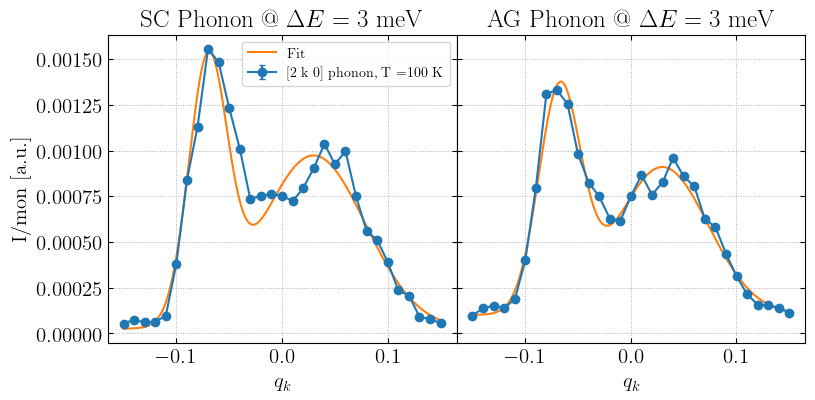

In [5]:
qk_range = np.linspace(min(sc_qk_phonon), max(sc_qk_phonon), 1000)

phonon_area_sc = gaussN_fit.values[0]
phonon_area_ag = gaussN_fit_ag.values[0]

fig, ax = plt.subplots(1,2, figsize=(9,4), sharey=True)

ax[0].errorbar(sc_qk_phonon, sc_I_phonon, sc_I_err_phonon, fmt='o-', label='[2 k 0] phonon, T =100 K')
ax[0].plot(qk_range, A_N_gauss(qk_range, *gaussN_fit.values), label='Fit')
ax[0].set_ylabel('I/mon [a.u.]')
ax[0].set_xlabel(r'$q_k$')
ax[0].set_title(r'SC Phonon @ $\Delta E = 3$ meV')
ax[0].legend(fontsize=10)

ax[1].errorbar(ag_qk_phonon, ag_I_phonon, ag_I_err_phonon, fmt='o-', label='2 k 0 phonon, T =100 K')
ax[1].plot(qk_range, A_N_gauss(qk_range, *gaussN_fit_ag.values), label='Fit')
#ax[1].set_ylabel('I/mon [a.u.]')
ax[1].set_xlabel(r'$q_k$')
ax[1].set_title(r'AG Phonon @ $\Delta E = 3$ meV')

plt.subplots_adjust(wspace=0)
ax[0].grid(True, which='both', linestyle=':', linewidth=0.7)
ax[1].grid(True, which='both', linestyle=':', linewidth=0.7)
#plt.tight_layout()
plt.savefig('Figures_png/TAIPAN/phonons_both_TAIPAN.png', format='png', bbox_inches='tight')
plt.savefig('Figures_eps/TAIPAN/phonons_both_TAIPAN.eps', format='eps', bbox_inches='tight')

### Calculating all the other parameters needed for phonon normalisation

#### Common/SC

In [6]:

########################################## f(Q) ########################################## 
# for Q 
Q_magnetic = np.sqrt(0.5**2+0.5**2)

def f_q(Q, A, a, B, b, C, c, D):
    partA = A * np.exp(-a*((Q)/(4*np.pi))**2)
    partB = B * np.exp(-b*((Q)/(4*np.pi))**2)
    partC = C * np.exp(-c*((Q)/(4*np.pi))**2)
    return partA + partB + partC + D

fq_NCCO = f_q(Q_magnetic, 0.0232, 34.9686, 0.4023, 11.5640, 0.5882, 3.8428, -0.0137) # 0.935 * f_q(Q_magnetic, 0.0540, 25.0293, 0.3101, 12.1020, 0.6575, 4.7223, -0.0216) +

print(fq_NCCO)
#f_q = 0.935 * (0.054 * np.exp(-25.0293 * (1 / (2 * np.pi)**2)) + 0.3101 * np.exp(-12.1020 * (1 / (2 * np.pi)**2)) + 0.6575 * np.exp(-4.7223 * (1 / (2 * np.pi)**2)) - 0.0216) + 0.0232 * np.exp(-34.9686 * (1 / (2 * np.pi)**2)) + 0.4023 * np.exp(-11.5640 * (1 / (2 * np.pi)**2)) + 0.5882 * np.exp(-3.8428 * (1 / (2 * np.pi)**2)) - 0.0137 

########################################## F_N(Q) ########################################## 

F_N_200 = 89.7943

########################################## m/M ########################################## 

neutron_au_mass = 1.009

Nd_au_mass = 144.243 # 4 Nd atoms - 15% Ce
Ce_au_mass = 140.116 # 15 % Ce atoms
Cu_au_mass = 63.546 # 2 Cu atoms
O_au_mass = 15.999 # 8 O atoms

M = 2*((2-0.15)*Nd_au_mass+0.15*Ce_au_mass+Cu_au_mass+4*O_au_mass)

mM = neutron_au_mass/M
print(mM)

########################################## $(\hbar \mathbf{Q})^2/2m$ ########################################## 

b1_sc_phonon = gaussN_fit.values[2]
b2_sc_phonon = gaussN_fit.values[4]

avg_sc_branch = (b2_sc_phonon-b1_sc_phonon)/2
print('avg_branch_length (SC) =', avg_sc_branch)

Q_sc = np.sqrt((2*2*np.pi/3.957)**2 + (avg_sc_branch*2*np.pi/3.957)**2)*10**(10) # [m^(-1)]

hbarQ_2m_sc = 1.054*10**(-34)*5.682*10**(-13)*(Q_sc**2)/(2*1.67*10**(-27)) # [meV]
print('SC_hbar =',hbarQ_2m_sc)


########################################## $d\omega / dq$ ########################################## 

q_avg_sc_branch = (b2_sc_phonon + b1_sc_phonon)/2

#print('zone center phonon AG = ', q_avg_ag_branch)
#print('zone center phonon SC = ',q_avg_sc_branch)

print('avg branch distance SC = ', avg_sc_branch)

dw_dq_sc = abs(3/avg_sc_branch) #[meV/r.l.u.]

print('dw/dq SC =',dw_dq_sc)


########################################## $n_q/(\hbar \omega)$ ########################################## 

# for both phonons which are both at Delta E = 3 meV and 100 K 
nq = 1/(1-np.exp(-3/(0.08617*100)))

nq_hbar = nq/3 # [meV^-1]

print('nq/(hbar omega) =',nq_hbar)


########################################## $N k_F R_0$ ########################################## 

# Find average volumen of the two volume branches
avg_sc_vol = (gaussN_fit.values[0]*gaussN_fit.values[1] + gaussN_fit.values[0]*(1-gaussN_fit.values[1]))/2
print('Avg branch volume (SC) = ',avg_sc_vol)

# Find resolution volume
NkfR0_sc = avg_sc_vol/(1*F_N_200*1*mM*hbarQ_2m_sc*nq_hbar*1/(dw_dq_sc)) # [meV/barn]

print('Resolution volume (SC) = ',NkfR0_sc)

0.9759910950667554
0.0012144658895770059
avg_branch_length (SC) = 0.05000000000000027
SC_hbar = 18.09482345604738
avg branch distance SC =  0.05000000000000027
dw/dq SC = 59.99999999999967
nq/(hbar omega) = 1.1337624368181876
Avg branch volume (SC) =  9.02219703706936e-05
Resolution volume (SC) =  0.002419652800756113


#### AG

In [7]:
########################################## $(\hbar \mathbf{Q})^2/2m$ ########################################## 

b1_ag_phonon = gaussN_fit_ag.values[2]
b2_ag_phonon = gaussN_fit_ag.values[4]

avg_ag_branch = (b2_ag_phonon-b1_ag_phonon)/2
print('avg_branch_length (AG) =',avg_ag_branch)

Q_ag = np.sqrt((2*2*np.pi/3.957)**2 + (avg_ag_branch*2*np.pi/3.957)**2)*10**(10)

hbarQ_2m_ag = 1.054*10**(-34)*5.682*10**(-13)*(Q_ag**2)/(2*1.67*10**(-27)) # [meV]

print('AG_hbar =',hbarQ_2m_ag)


########################################## $d\omega / dq$ ########################################## 

q_avg_ag_branch = (b2_ag_phonon+b1_ag_phonon)/2

#print('zone center phonon AG = ', q_avg_ag_branch)
#print('zone center phonon SC = ',q_avg_sc_branch)

print('avg branch distance AG = ', avg_ag_branch)

dw_dq_ag = abs(3/avg_ag_branch) #[meV/r.l.u.]

print('dw/dq AG =',dw_dq_ag)

########################################## $N k_F R_0$ ########################################## 


# Find average volumen of the two volume branches
avg_ag_vol = (gaussN_fit_ag.values[0]*gaussN_fit_ag.values[1] + gaussN_fit_ag.values[0]*(1-gaussN_fit_ag.values[1]))/2
print('Avg branch volume (AG) = ', avg_ag_vol)
# Find resolution volume
NkfR0_ag = avg_ag_vol/(1*F_N_200*1*mM*hbarQ_2m_ag*nq_hbar*1/(dw_dq_ag)) # [meV/barn]

print('Resolution volume (AG) = ',NkfR0_ag)

avg_branch_length (AG) = 0.048685079174253354
AG_hbar = 18.094236812757757
avg branch distance AG =  0.048685079174253354
dw/dq AG = 61.62052215756736
Avg branch volume (AG) =  7.431194479458881e-05
Resolution volume (AG) =  0.0020468573496251656


### LATEX Tabel of calculated values

In [8]:
def generate_latex_table(sample_name, values):
    # Table header
    table = f"""
\\begin{{table}}[ht]
\\begin{{center}}
\\renewcommand{{\\arraystretch}}{{1.5}}
\\begin{{tabularx}}{{\\textwidth}}{{>{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X }}
    \\multicolumn{{8}}{{c}}{{Phonon Normalization quantities {sample_name} sample @ TAIPAN}} \\\\[8pt]
    \\hline
    $f(\\mathbf{{Q}})$ & $Nk_fR_0$ & $\\int \\Tilde{{I}}_{{pho}} d\\mathbf{{q}}$ & $F_N(2 0 0)^2$ & $m/M$ & $(\\hbar \\mathbf{{Q}})^2/2m$ & $n_q/(\\hbar \\omega)$ & $d\\omega / dq$ \\\\
    \\hline\\hline
    - & meV/barn 3 & r.l.u. & barns & - & meV & me$V^{{-1}}$ & meV/r.l.u \\\\
    \\hline
    """
    
    # Add the values
    table += " & ".join(map(str, values)) + " \\\\\n"
    
    # Closing the table
    table += """
    \\hline
\\end{tabularx}
\\end{center}
\\caption{Table of Quantities}  
\\label{tab:quantities}
\\end{table}
    """
    
    return table

# Define the values for AG and SC samples
ag_values = [round(fq_NCCO,3), round(NkfR0_ag,5), round(avg_ag_vol,7), round(F_N_200,3), round(mM,5), round(hbarQ_2m_ag,3), round(nq_hbar,3), round(dw_dq_ag,3)]
sc_values = [round(fq_NCCO,3), round(NkfR0_sc,5), round(avg_sc_vol,7), round(F_N_200,3), round(mM,5), round(hbarQ_2m_sc,3), round(nq_hbar,3), round(dw_dq_sc,3)]

# Generate LaTeX code for both tables
latex_ag_table = generate_latex_table("AG", ag_values)
latex_sc_table = generate_latex_table("SC", sc_values)

# Print the LaTeX code for the tables
print(latex_ag_table)
print(latex_sc_table)


\begin{table}[ht]
\begin{center}
\renewcommand{\arraystretch}{1.5}
\begin{tabularx}{\textwidth}{>{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X }
    \multicolumn{8}{c}{Phonon Normalization quantities AG sample @ TAIPAN} \\[8pt]
    \hline
    $f(\mathbf{Q})$ & $Nk_fR_0$ & $\int \Tilde{I}_{pho} d\mathbf{q}$ & $F_N(2 0 0)^2$ & $m/M$ & $(\hbar \mathbf{Q})^2/2m$ & $n_q/(\hbar \omega)$ & $d\omega / dq$ \\
    \hline\hline
    - & meV/barn 3 & r.l.u. & barns & - & meV & me$V^{-1}$ & meV/r.l.u \\
    \hline
    0.976 & 0.00205 & 7.43e-05 & 89.794 & 0.00121 & 18.094 & 1.134 & 61.621 \\

    \hline
\end{tabularx}
\end{center}
\caption{Table of Quantities}  
\label{tab:quantities}
\end{table}
    

\begin{table}[ht]
\begin{center}
\renewcommand{\arraystretch}{1.5}
\begin{tabularx}{\textwidth}{>{\centering

## Read data from Jeppes analysis

In [9]:
import re
from collections import defaultdict

def load_hdf5_to_datasets(filename):
    datasets = {}

    with h5py.File(filename, "r") as hdf_file:
        grouped_data = defaultdict(dict)
        suffixes = set()

        # Identify all unique suffixes in the variable names
        for key in hdf_file.keys():
            match = re.search(r"_(\d+(?:p\d+)?m\d+k)$", key)  # Match `_XpYmk`
            if match:
                suffixes.add(match.group(1))

        # Group variables by their prefixes and detected suffixes
        for key in hdf_file.keys():
            match = re.match(r"^(ag|sc)_.*?(_\d+(?:p\d+)?m\d+k)$", key)
            if match:
                prefix = match.group(1)
                suffix = match.group(2)
                group = f"{prefix}{suffix}"
                grouped_data[group][key] = hdf_file[key][:]
        
        # Create Dataset objects for each group
        for group_name, group_vars in grouped_data.items():
            # Extract arrays based on naming conventions
            qh = next((v for k, v in group_vars.items() if "qh" in k.lower()), None)
            qk = next((v for k, v in group_vars.items() if "qk" in k.lower()), None)
            cnt = next((v for k, v in group_vars.items() if "cnt" in k.lower()), None)
            cnt_err = next((v for k, v in group_vars.items() if "cnt_err" in k.lower()), None)
            mn = next((v for k, v in group_vars.items() if "mon" in k.lower()), None)

            # Extract experimental parameters from the suffix
            match = re.search(r"_(\d+(?:p\d+)?)m(\d+)k$", group_name)
            if match:
                en_str = match.group(1).replace('p', '.')  # Replace 'p' with '.' for decimal values
                en = float(en_str)
                tt = int(match.group(2))
            else:
                en = None
                tt = None

            # Create the Dataset object
            datasets[group_name] = Dataset(qh, qk, cnt, cnt_err, mn, en, tt)

    return datasets

AllSets = load_hdf5_to_datasets("./Student_Analysis/Jeppe/combined_data.h5")

In [10]:
AllSets

{'ag_2m27k': EN=2.0, TT=27, data_length=35, metadata={}),
 'ag_2m3k': EN=2.0, TT=3, data_length=35, metadata={}),
 'ag_2p5m27k': EN=2.5, TT=27, data_length=31, metadata={}),
 'ag_3m27k': EN=3.0, TT=27, data_length=31, metadata={}),
 'ag_3m3k': EN=3.0, TT=3, data_length=31, metadata={}),
 'ag_4m27k': EN=4.0, TT=27, data_length=31, metadata={}),
 'ag_4m3k': EN=4.0, TT=3, data_length=31, metadata={}),
 'ag_5m27k': EN=5.0, TT=27, data_length=35, metadata={}),
 'ag_5m3k': EN=5.0, TT=3, data_length=35, metadata={}),
 'ag_6m27k': EN=6.0, TT=27, data_length=31, metadata={}),
 'ag_6m3k': EN=6.0, TT=3, data_length=31, metadata={}),
 'sc_2m27k': EN=2.0, TT=27, data_length=35, metadata={}),
 'sc_2m3k': EN=2.0, TT=3, data_length=35, metadata={}),
 'sc_2p5m3k': EN=2.5, TT=3, data_length=31, metadata={}),
 'sc_3m3k': EN=3.0, TT=3, data_length=31, metadata={}),
 'sc_3p5m27k': EN=3.5, TT=27, data_length=31, metadata={}),
 'sc_4m3k': EN=4.0, TT=3, data_length=31, metadata={}),
 'sc_5m27k': EN=5.0, TT=27

In [11]:
# Lists to hold filtered datasets based on TT and prefix
AG_scans_3K = []
AG_scans_27K = []
SC_scans_3K = []
SC_scans_27K = []

# Iterate through all datasets and classify them based on the prefix (ag_/sc_) and TT value
for name, dataset in AllSets.items():
    if name.startswith("ag_"):
        # Create Dataset instance and append to the appropriate AG list based on TT
        ag_dataset = Dataset(dataset.QH, dataset.QK, dataset.CNT, dataset.CNT_err, dataset.MN, dataset.EN, dataset.TT, **dataset.metadata)
        if dataset.TT == 3:
            AG_scans_3K.append(ag_dataset)
        elif dataset.TT == 27:
            AG_scans_27K.append(ag_dataset)

    elif name.startswith("sc_"):
        # Create Dataset instance and append to the appropriate SC list based on TT
        sc_dataset = Dataset(dataset.QH, dataset.QK, dataset.CNT, dataset.CNT_err, dataset.MN, dataset.EN, dataset.TT, **dataset.metadata)
        if dataset.TT == 3:
            SC_scans_3K.append(sc_dataset)
        elif dataset.TT == 27:
            SC_scans_27K.append(sc_dataset)


In [12]:
def gauss_const(x, A, mu, sigma, a, C):
    return (A / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) + a*x+ C

# Constant model only
def model_const(x, a, C):
    return a*x+C

gauss_geuss = {'A': 20, 'mu':0.5, 'sigma':0.02, 'a': 200,'C':100}
gauss_limits = {'mu':(0.49, 0.51), 'sigma':(0.005,0.03)} # , 'sigma':(0.005,0.04)
gauss_fix = {'sigma':True}

C_geuss = {'a': 100,'C':100}


/Users/kristinekrighaar/Documents/KGS/KGS/fitting.py:302: FutureWarning: make_func_code is deprecated: Use of ``func_code`` attribute to declare parameters is deprecated. Use ``_parameters`` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


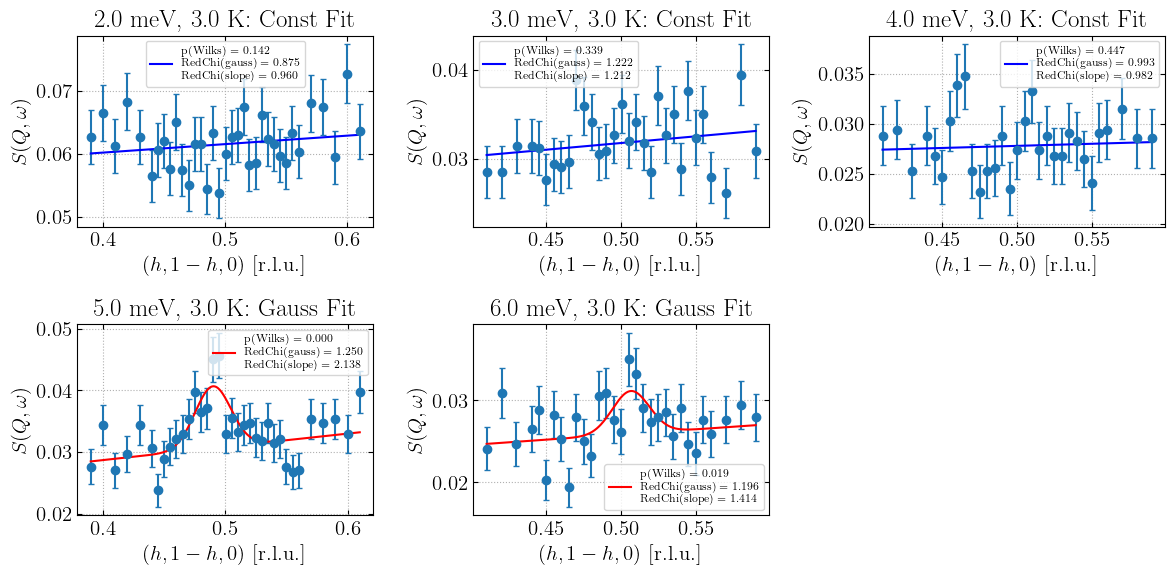

/Users/kristinekrighaar/Documents/KGS/KGS/fitting.py:302: FutureWarning: make_func_code is deprecated: Use of ``func_code`` attribute to declare parameters is deprecated. Use ``_parameters`` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


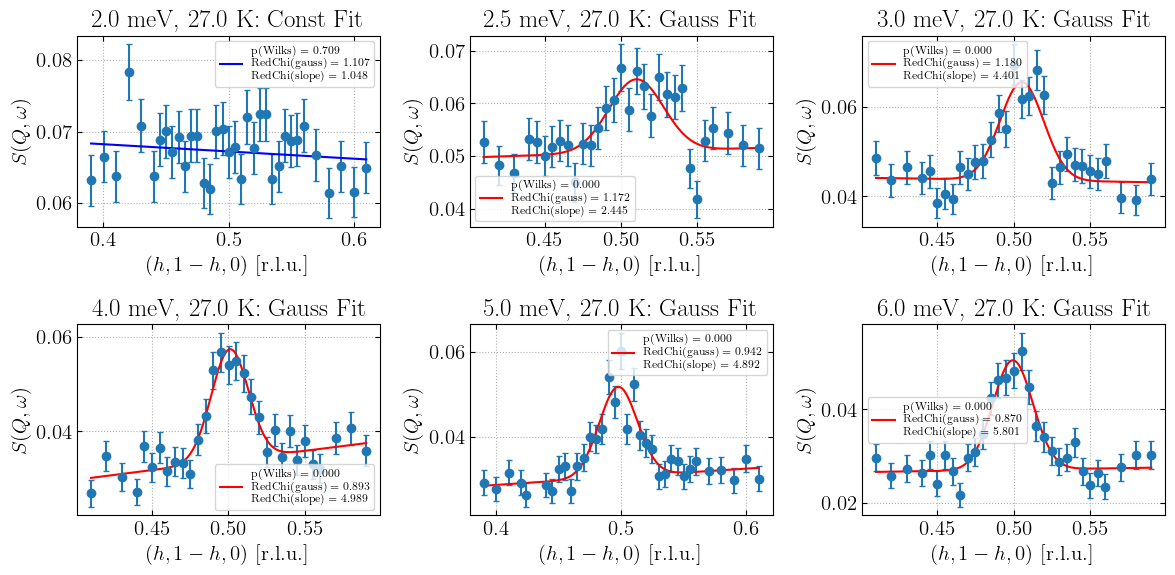

/Users/kristinekrighaar/Documents/KGS/KGS/fitting.py:302: FutureWarning: make_func_code is deprecated: Use of ``func_code`` attribute to declare parameters is deprecated. Use ``_parameters`` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


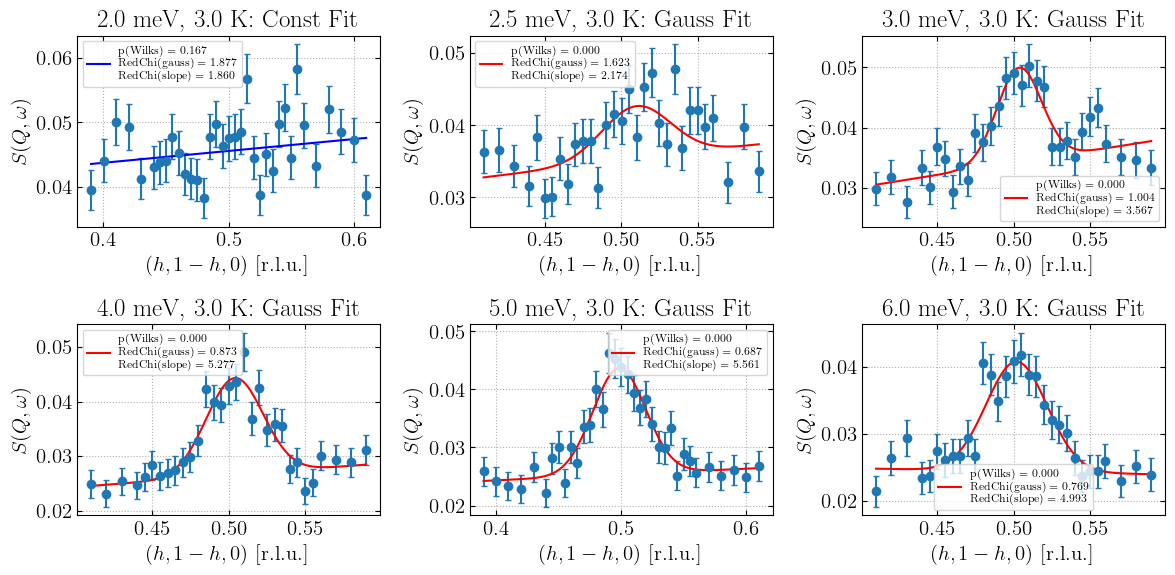

/Users/kristinekrighaar/Documents/KGS/KGS/fitting.py:302: FutureWarning: make_func_code is deprecated: Use of ``func_code`` attribute to declare parameters is deprecated. Use ``_parameters`` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


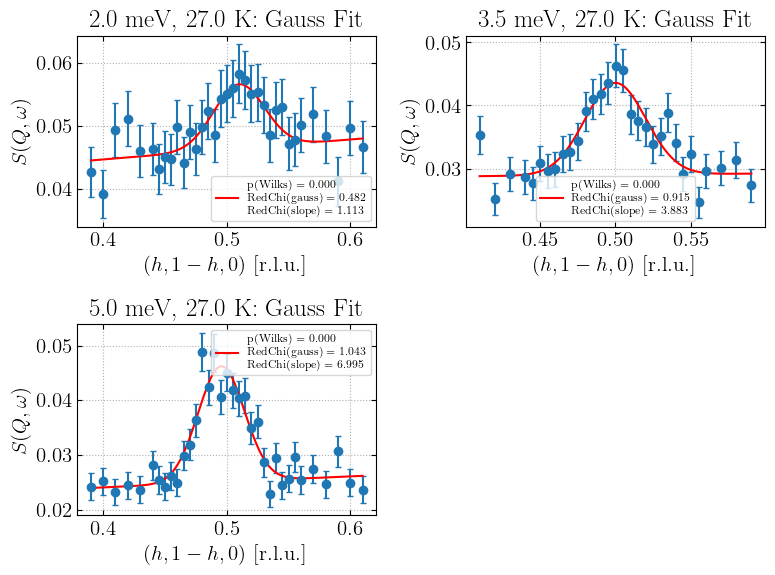

In [13]:

# Add magnetic form factor to all data objects
for i in range(len(AG_scans_3K)): 
    AG_scans_3K[i].fq = fq_NCCO
    AG_scans_3K[i].res_vol = NkfR0_ag
    AG_scans_3K[i].calc_I()
    AG_scans_3K[i].calc_SQ()
    AG_scans_3K[i].calc_Chi()
    AG_scans_3K[i].FindBestFit(model1=gauss_const,  model2=model_const, initial_guess1=gauss_geuss, limits1=gauss_limits, initial_guess2=C_geuss)

plot_fits(AG_scans_3K, sample='Ass-grown', temperature='3')


# Add magnetic form factor to all data objects
for i in range(len(AG_scans_27K)): 
    AG_scans_27K[i].fq = fq_NCCO
    AG_scans_27K[i].res_vol = NkfR0_ag
    AG_scans_27K[i].calc_I()
    AG_scans_27K[i].calc_SQ()
    AG_scans_27K[i].calc_Chi()
    AG_scans_27K[i].FindBestFit(model1=gauss_const,  model2=model_const, initial_guess1=gauss_geuss, limits1=gauss_limits, initial_guess2=C_geuss)

plot_fits(AG_scans_27K, sample='Ass-grown', temperature='27')

# Add magnetic form factor to all data objects
for i in range(len(SC_scans_3K)): 
    SC_scans_3K[i].fq = fq_NCCO
    SC_scans_3K[i].res_vol = NkfR0_sc
    SC_scans_3K[i].calc_I()
    SC_scans_3K[i].calc_SQ()
    SC_scans_3K[i].calc_Chi()
    SC_scans_3K[i].FindBestFit(model1=gauss_const,  model2=model_const, initial_guess1=gauss_geuss, limits1=gauss_limits, initial_guess2=C_geuss)

plot_fits(SC_scans_3K, sample='Superconducting', temperature='3')

# Add magnetic form factor to all data objects
for i in range(len(SC_scans_27K)): 
    SC_scans_27K[i].fq = fq_NCCO
    SC_scans_27K[i].res_vol = NkfR0_sc
    SC_scans_27K[i].calc_I()
    SC_scans_27K[i].calc_SQ()
    SC_scans_27K[i].calc_Chi()
    SC_scans_27K[i].FindBestFit(model1=gauss_const,  model2=model_const, initial_guess1=gauss_geuss, limits1=gauss_limits, initial_guess2=C_geuss)

plot_fits(SC_scans_27K, sample='Superconducting', temperature='27')

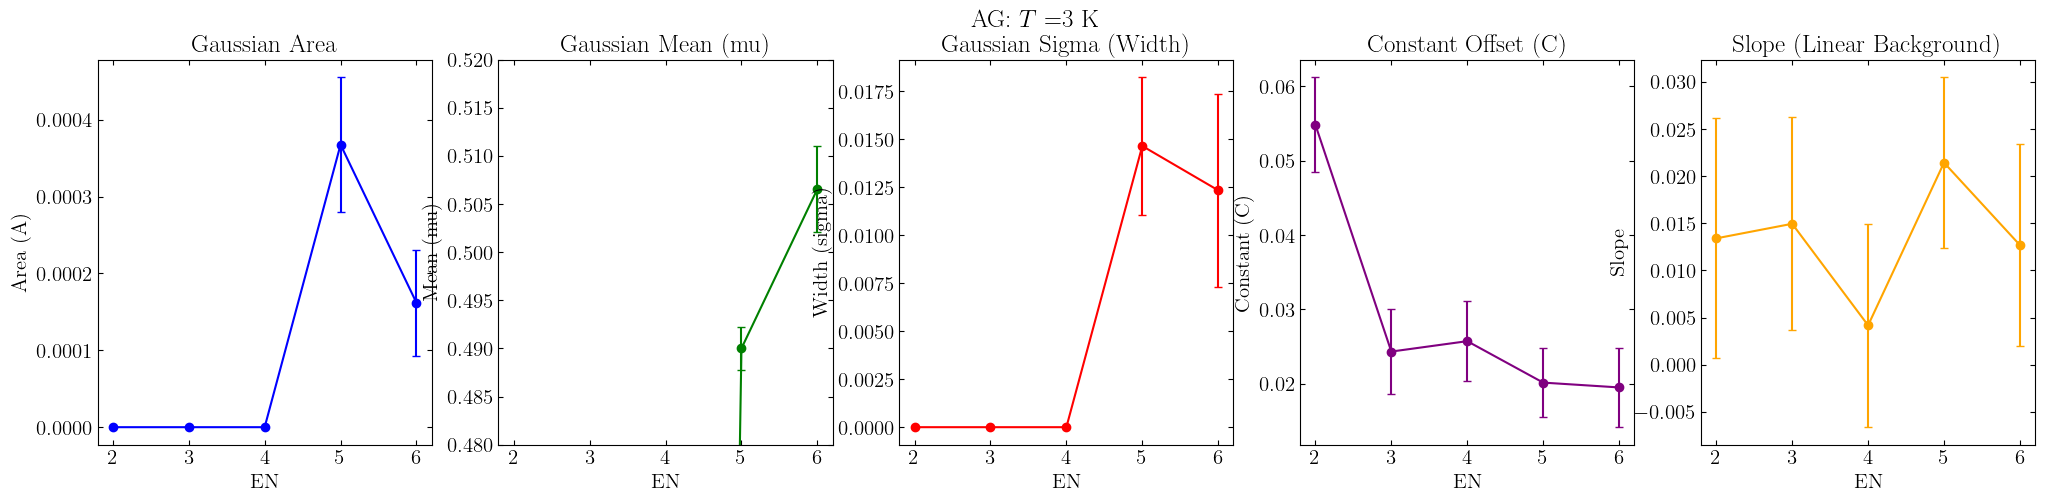

[0, 0, 0, 0.00036764644476089327, 0.00016179841419976894]


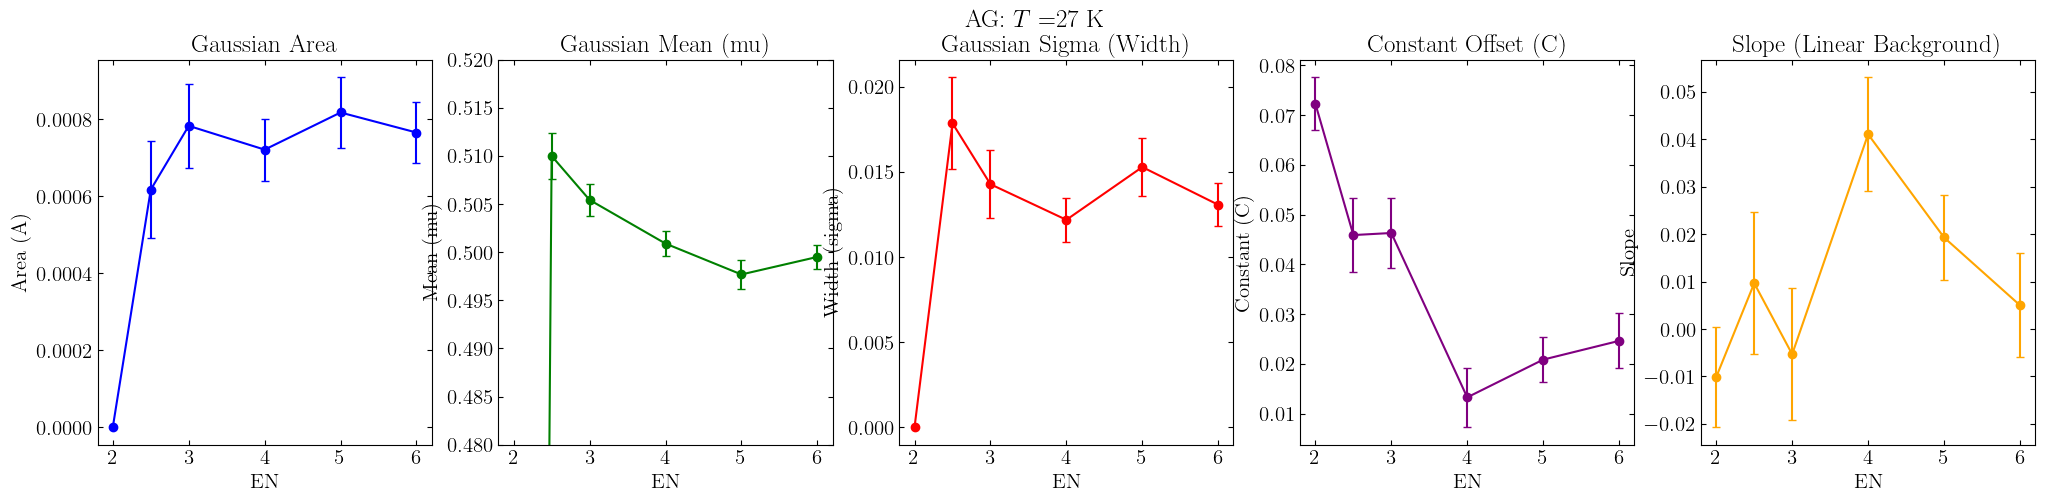

In [14]:
plot_fit_parameters(AG_scans_3K, x_attr='EN', title='AG: $T =$3 K')
area_ag_3K, area_err_ag_3K = PlotGaussArea(AG_scans_3K, x_attr='EN', title='AG: $T =$3 K')
print(area_ag_3K)

plot_fit_parameters(AG_scans_27K, x_attr='EN', title='AG: $T =$27 K')
area_ag_27K, area_err_ag_27K = PlotGaussArea(AG_scans_27K, x_attr='EN', title='AG: $T =$27 K')

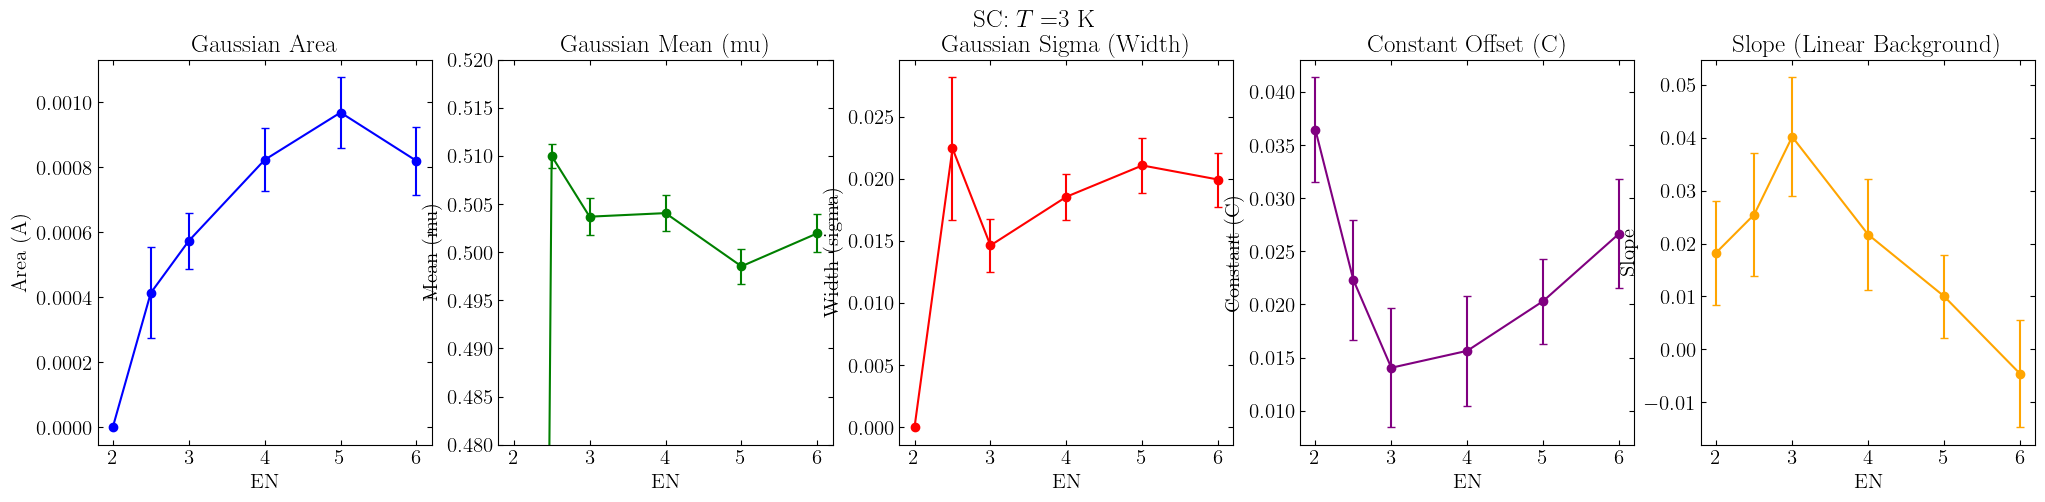

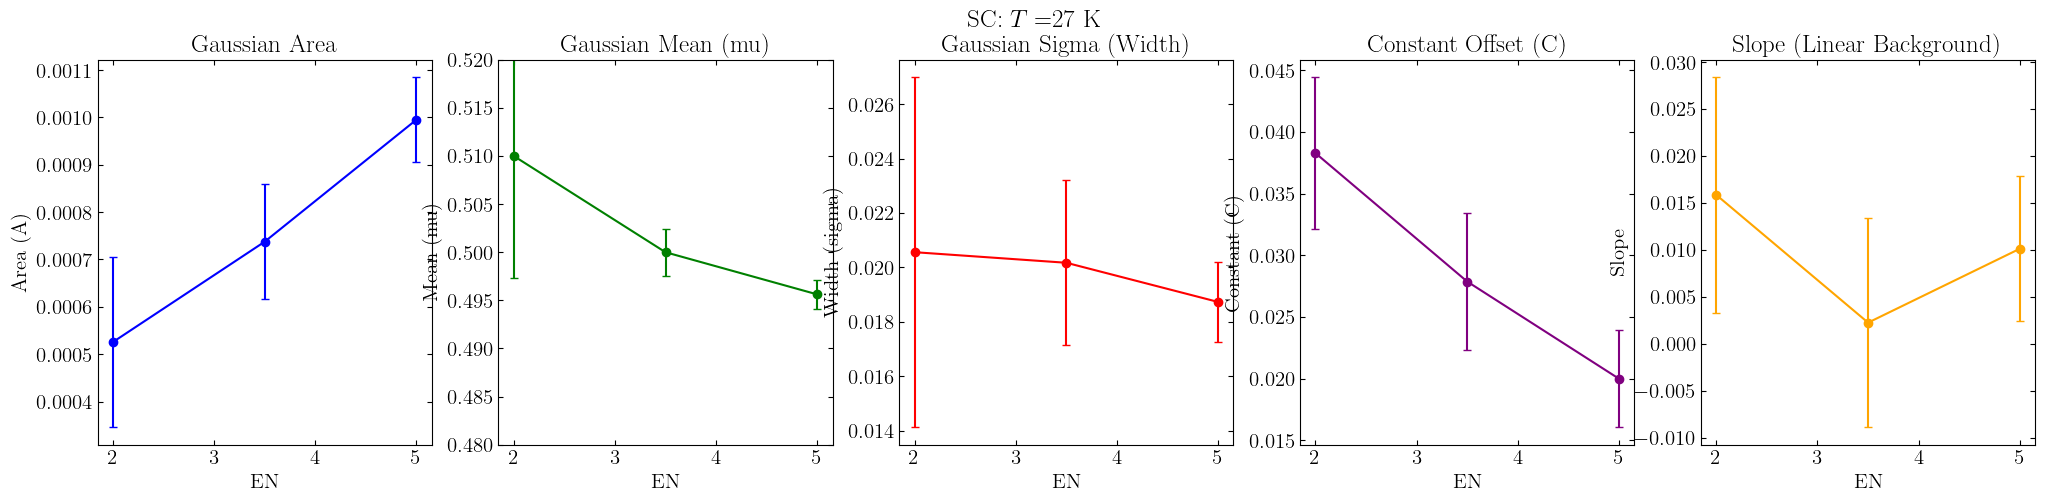

In [15]:
plot_fit_parameters(SC_scans_3K, x_attr='EN', title='SC: $T =$3 K')
area_sc_3K, area_err_sc_3K = PlotGaussArea(SC_scans_3K, x_attr='EN', title='SC: $T =$3 K')

plot_fit_parameters(SC_scans_27K, x_attr='EN', title='SC: $T =$27 K')
area_sc_27K, area_err_sc_27K = PlotGaussArea(SC_scans_27K, x_attr='EN', title='SC: $T =$27 K')

In [16]:
EN_ag_27K = np.array([2, 2.5, 3, 4,5,6])
EN_ag_3K = np.array([2, 3,4,5,6])

EN_sc_27K = np.array([2, 3.5, 5])
EN_sc_3K = np.array([2, 2.5,3,4,5,6])

plt.rcParams.update({
    'figure.figsize': (3.5, 2.5),     # Width x Height in inches for single plots
    'font.size': 10,                  # Base font size
    'axes.labelsize': 10,             # Label font size
    'xtick.labelsize': 8,             # X-axis tick label size
    'ytick.labelsize': 8,             # Y-axis tick label size
    'legend.fontsize': 8,             # Legend font size
    'axes.titlesize': 10,             # Title font size
    'figure.dpi': 300,                # Dots per inch for high-quality output
    'savefig.dpi': 300,
    'font.family': 'serif',    # Use serif font to match many article styles
    'lines.linewidth': 1.5                # DPI for saving figures
})

In [17]:
# Create a spline interpolator
x_energy = np.linspace(np.min(EN_ag_27K)-0.5, 7, 100)


def sigmoid2(x, x0, k, top):
    y =  (top) / (1 + np.exp(-k*(x-x0)))
    return y

sigmoid_geuss = {'x0': 2.2, 'k':4.5, 'top':0.75}
sigmoid_fix = {'bottom':True}

fit_ag_27K = fit(EN_ag_27K, np.asarray(area_ag_27K)*10**3, np.asarray(area_err_ag_27K)*10**3, sigmoid2, sigmoid_geuss)
print(fit_ag_27K.values)

lin_geuss_ag_3k = {'a': 0.1, 'b':0}
fix_lin1 = {'b':True}
area_ag_3K[0]= 0.000001
area_sc_3K[1]= 0.000001
area_sc_3K[2]= 0.000001
fit_ag_3K = fit(EN_ag_3K, np.asarray(area_ag_3K)*10**3, np.asarray(area_err_ag_3K)*10**3, model_const, lin_geuss_ag_3k)
print(fit_ag_3K.values)

sigmoid_geuss_sc_3k = {'x0': 3.0, 'k':4.5, 'top':0.85}
area_sc_3K[0]= 0.000001
fit_sc_3K = fit(EN_sc_3K, np.asarray(area_sc_3K)*10**3, np.asarray(area_err_sc_3K)*10**3, sigmoid2, sigmoid_geuss_sc_3k)
print(fit_sc_3K.values)

lin_geuss_sc_27k = {'a': 3.0, 'b':0}
fix_lin2 = {'b':True}
fit_sc_27K = fit(EN_sc_27K, np.asarray(area_sc_27K)*10**3, np.asarray(area_err_sc_27K)*10**3, model_const, lin_geuss_sc_27k)
print(fit_sc_27K.values)
x_energy_27K = np.linspace(np.min(EN_sc_27K)-0.5, 6, 100)


<ValueView x0=2.400229086576738 k=14.163749467125124 top=0.7676197953029655>
Given names not corresponding to function, overwriting...
<ValueView a=0.027995953400961823 b=0.06742694933103652>
<ValueView x0=3.7110568076889496 k=8.578227665069175 top=0.8916887483347617>
Given names not corresponding to function, overwriting...
<ValueView a=0.16028857097755367 b=0.19009453725266745>


/Users/kristinekrighaar/Documents/KGS/KGS/fitting.py:302: FutureWarning: make_func_code is deprecated: Use of ``func_code`` attribute to declare parameters is deprecated. Use ``_parameters`` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])


<>:33: SyntaxWarning: invalid escape sequence '\h'
<>:33: SyntaxWarning: invalid escape sequence '\h'
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_85950/2778320065.py:33: SyntaxWarning: invalid escape sequence '\h'
  ax[1].set_xlabel('$\hbar \omega$ [meV]')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


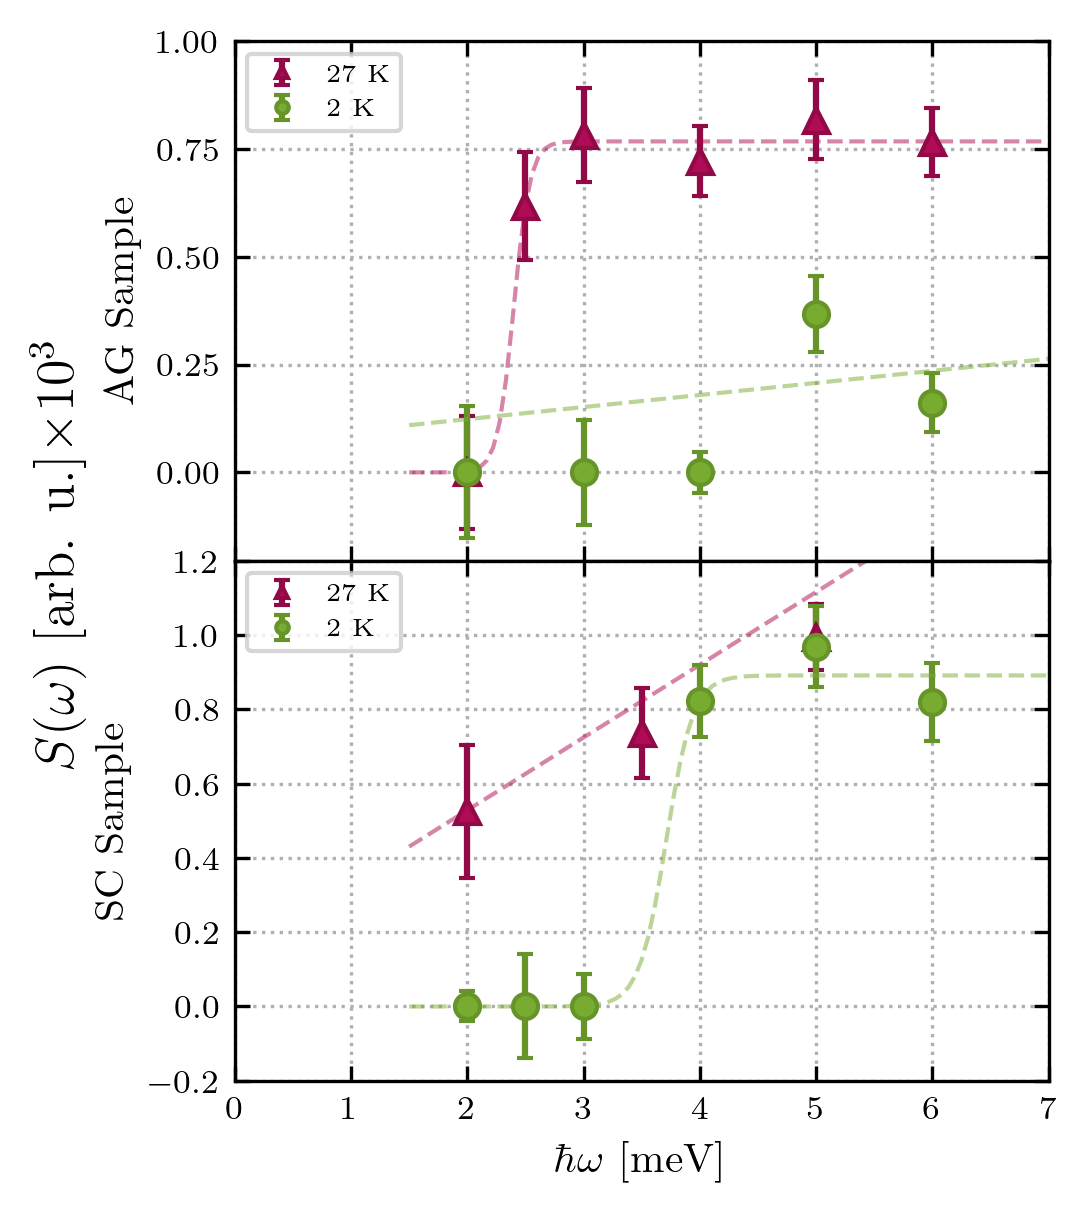

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(3.5, 4.5))
fig.subplots_adjust(hspace=0, wspace=0.05)

ax[0].errorbar(EN_ag_27K, np.asarray(area_ag_27K)*10**(3), capsize=2, yerr=np.asarray(area_err_ag_27K)*10**(3), fmt='^', label='27 K', color='#B00B55', ecolor='#910946', mew=1, markeredgecolor='#910946')
ax[0].plot(x_energy, sigmoid2(x_energy, *fit_ag_27K.values), '--', color='#B00B55', linewidth=1, alpha=0.5)
#ax[0].plot(np.linspace(3,7,100), np.ones(100)*0.74493, '--', color='#e7298a', linewidth=1, alpha=0.5 )

ax[0].errorbar(EN_ag_3K, np.asarray(area_ag_3K)*10**(3), capsize=2, yerr=np.asarray(area_err_ag_3K)*10**(3), fmt='o', label='2 K', color='#77AC30', ecolor='#669428', mew=1, markeredgecolor='#669428')
ax[0].plot(x_energy, model_const(x_energy, *fit_ag_3K.values), '--', color='#77AC30', linewidth=1, alpha=0.5)

ax[0].grid(linestyle='dotted')
ax[0].set_xticks([0,1,2,3,4,5,6,7])
ax[0].legend(fontsize=6, markerscale=0.5)
ax[0].set_yticks([0, 0.25, 0.5, 0.75, 1.0])

ax[1].errorbar(EN_sc_27K, np.asarray(area_sc_27K)*10**(3), yerr=np.asarray(area_err_sc_27K)*10**(3), capsize=2, fmt='^', label='27 K', color='#B00B55', ecolor='#910946', mew=1, markeredgecolor='#910946')
ax[1].plot(x_energy_27K, model_const(x_energy, *fit_sc_27K.values), '--', color='#B00B55', linewidth=1, alpha=0.5)

ax[1].errorbar(EN_sc_3K, np.asarray(area_sc_3K)*10**(3), yerr=np.asarray(area_err_sc_3K)*10**(3), capsize=2,fmt='o', label='2 K', color='#77AC30', ecolor='#669428', mew=1, markeredgecolor='#669428')
ax[1].plot(x_energy, sigmoid2(x_energy, *fit_sc_3K.values), '--', color='#77AC30', linewidth=1, alpha=0.5)


ax[1].grid(linestyle='dotted')
ax[1].set_xticks([0,1,2,3,4,5,6,7])
ax[0].set_xticklabels([])

ax[0].set_ylabel('AG Sample')
ax[1].set_ylabel('SC Sample')
ax[1].legend(fontsize=6, markerscale=0.5)
ax[1].set_xlim(0, 7)
ax[1].set_ylim(-0.2, 1.2)
ax[0].set_xlim(0, 7)
ax[1].set_xlabel('$\hbar \omega$ [meV]')
fig.text(-0.07, 0.5, r'$ S(\omega)$ [arb. u.]$\times 10^3$', va='center', rotation='vertical', fontsize=13)

plt.savefig('Figures_eps/TAIPAN/E_dependence.eps', format='eps', bbox_inches='tight')
plt.savefig('Figures_png/TAIPAN/E_dependence.png', format='png', bbox_inches='tight') 